```
This software is part of GPU Ocean. 

Copyright (C) 2017-2019 SINTEF Digital
Copyright (C) 2017-2019 Norwegian Meteorological Institute

This notebook implements the plotting of planetary and topographic 
Rossby waves test cases, as reported under cases D and E in "Evaluation of Selected 
Finite-Difference and Finite-Volume Approaches to Rotational Shallow-Water Flow" 
by Holm, Brodtkorb, Broström, Christensen and Sætra.

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
```

# Plotting of Cases E and F: Planetary/Topographic Rossby waves

Since cases E and F develop similar results, the same notebook is used for producing plots for both test cases.

This notebook reads NetCDF results produced by `CaseE_PlanetaryRossbyWaves.ipynb` or `CaseF_TopographicRossbyWaves.ipynb`, and visualize the results at different time-steps. It also generates Hovmüller diagrams which shows a timeseries across a cross section of the domain.

### To use this notebook:
In the second code python cell, the simulation result filenames are defined. As before, you can
- download the results presented in the paper from `http://gpu-ocean.met.no:9000/python/2018_01_19_planetary_improved_params/` (Case E) or `http://gpu-ocean.met.no:9000/python/2018_01_19_topographic_improved_params/` (Case F), and use the default file names, or
- generate result files using the other notebooks. 

Use the boolean variabel `TOPOGRAPHIC` to select planetary or topographic results.





#### Import modules and set up environment

In [1]:
#Lets have matplotlib "inline"
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#Import packages we need
import numpy as np
from matplotlib import animation, rc
from matplotlib import pyplot as plt
from matplotlib import gridspec

import os
import datetime
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../../')))

#Set large figure sizes
rc('figure', figsize=(5.0, 4.0))
rc('animation', html='html5')

#Import our Simulation Reader
from SWESimulators import SimReader


# Main figures for planetary / topographic Rossby waves

Long term effects, plotted in the $x$-$t$ plane at three different $y$-values, and along side the final timestep.

imgdir: paper_images_2019_02_04-14_20_42/
Max eta: 0.06648965
Min eta: -0.09317757
Max eta: 0.06785703
Min eta: -0.091661915
Max eta: 0.03933961
Min eta: -0.072380684
Max eta: 0.06773274
Min eta: -0.087316476


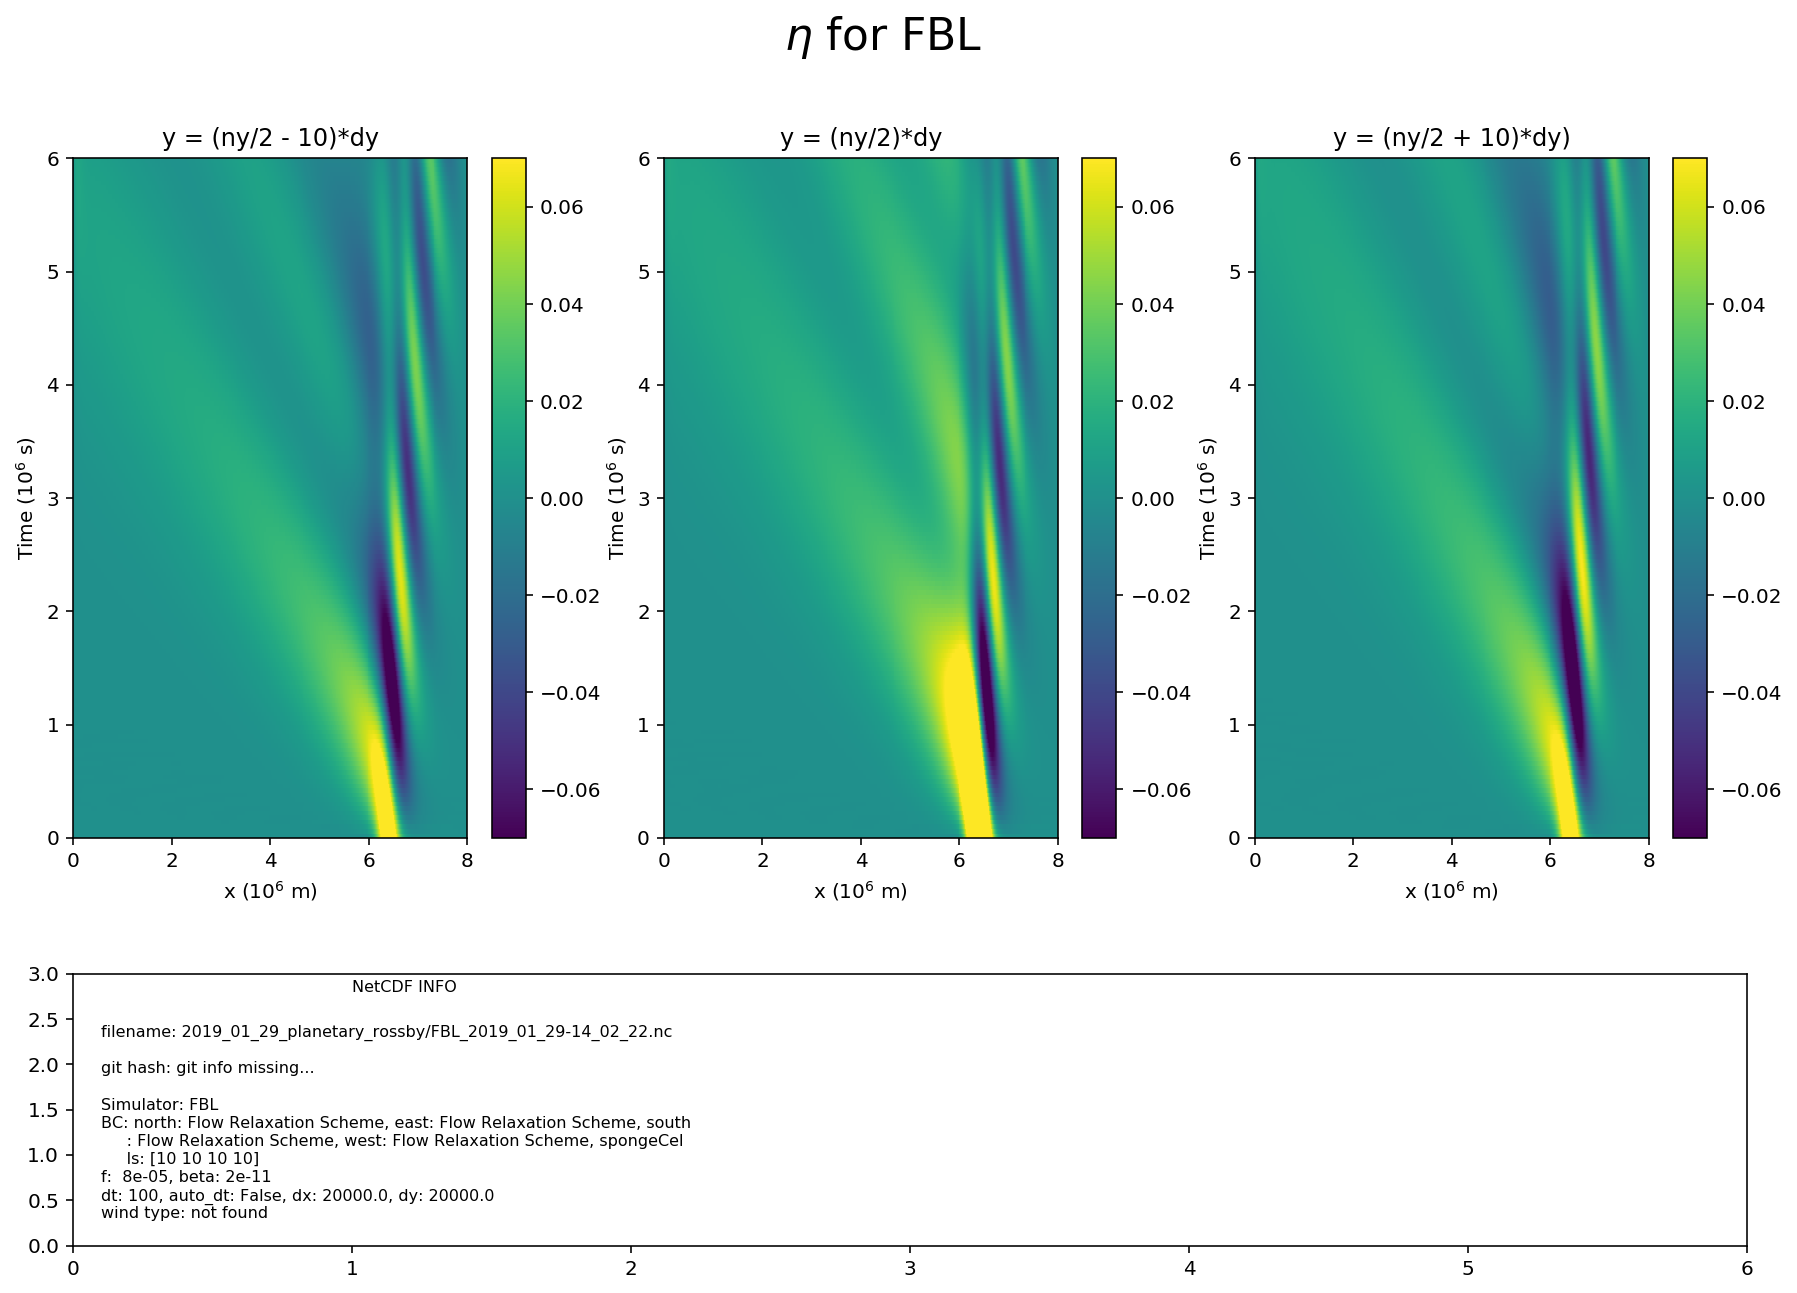

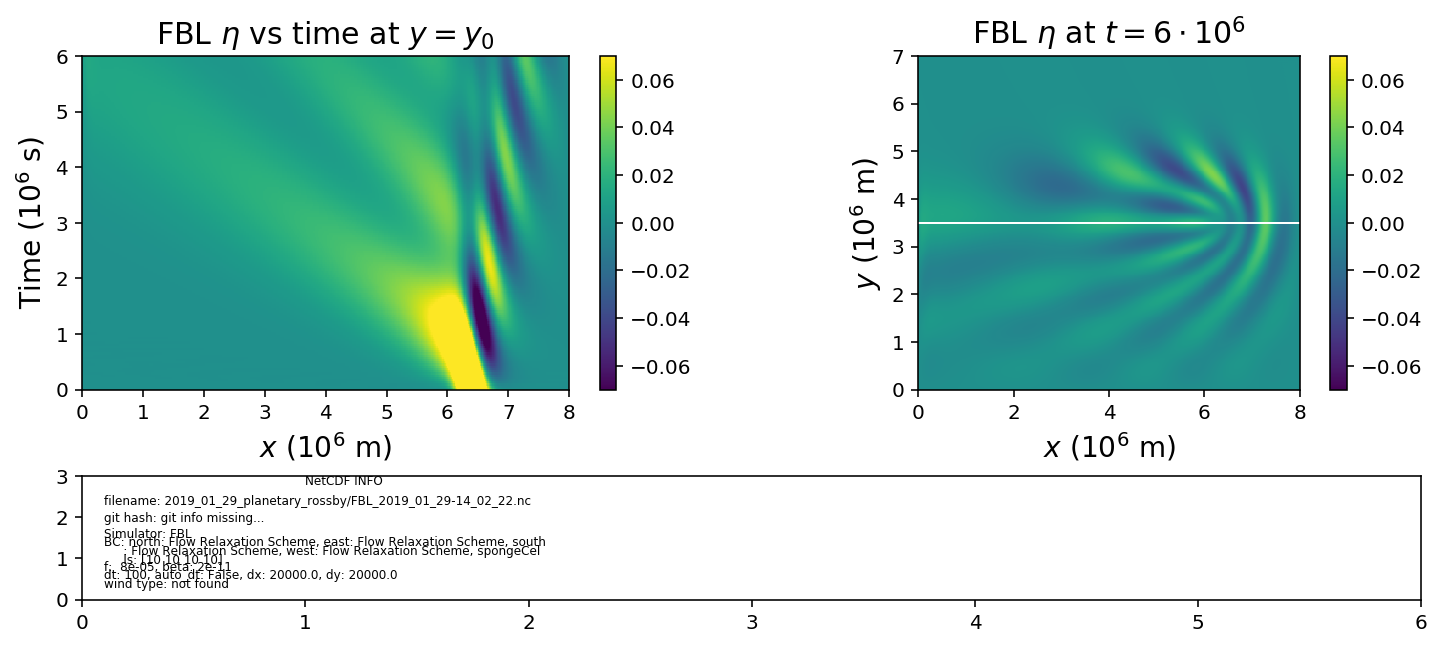

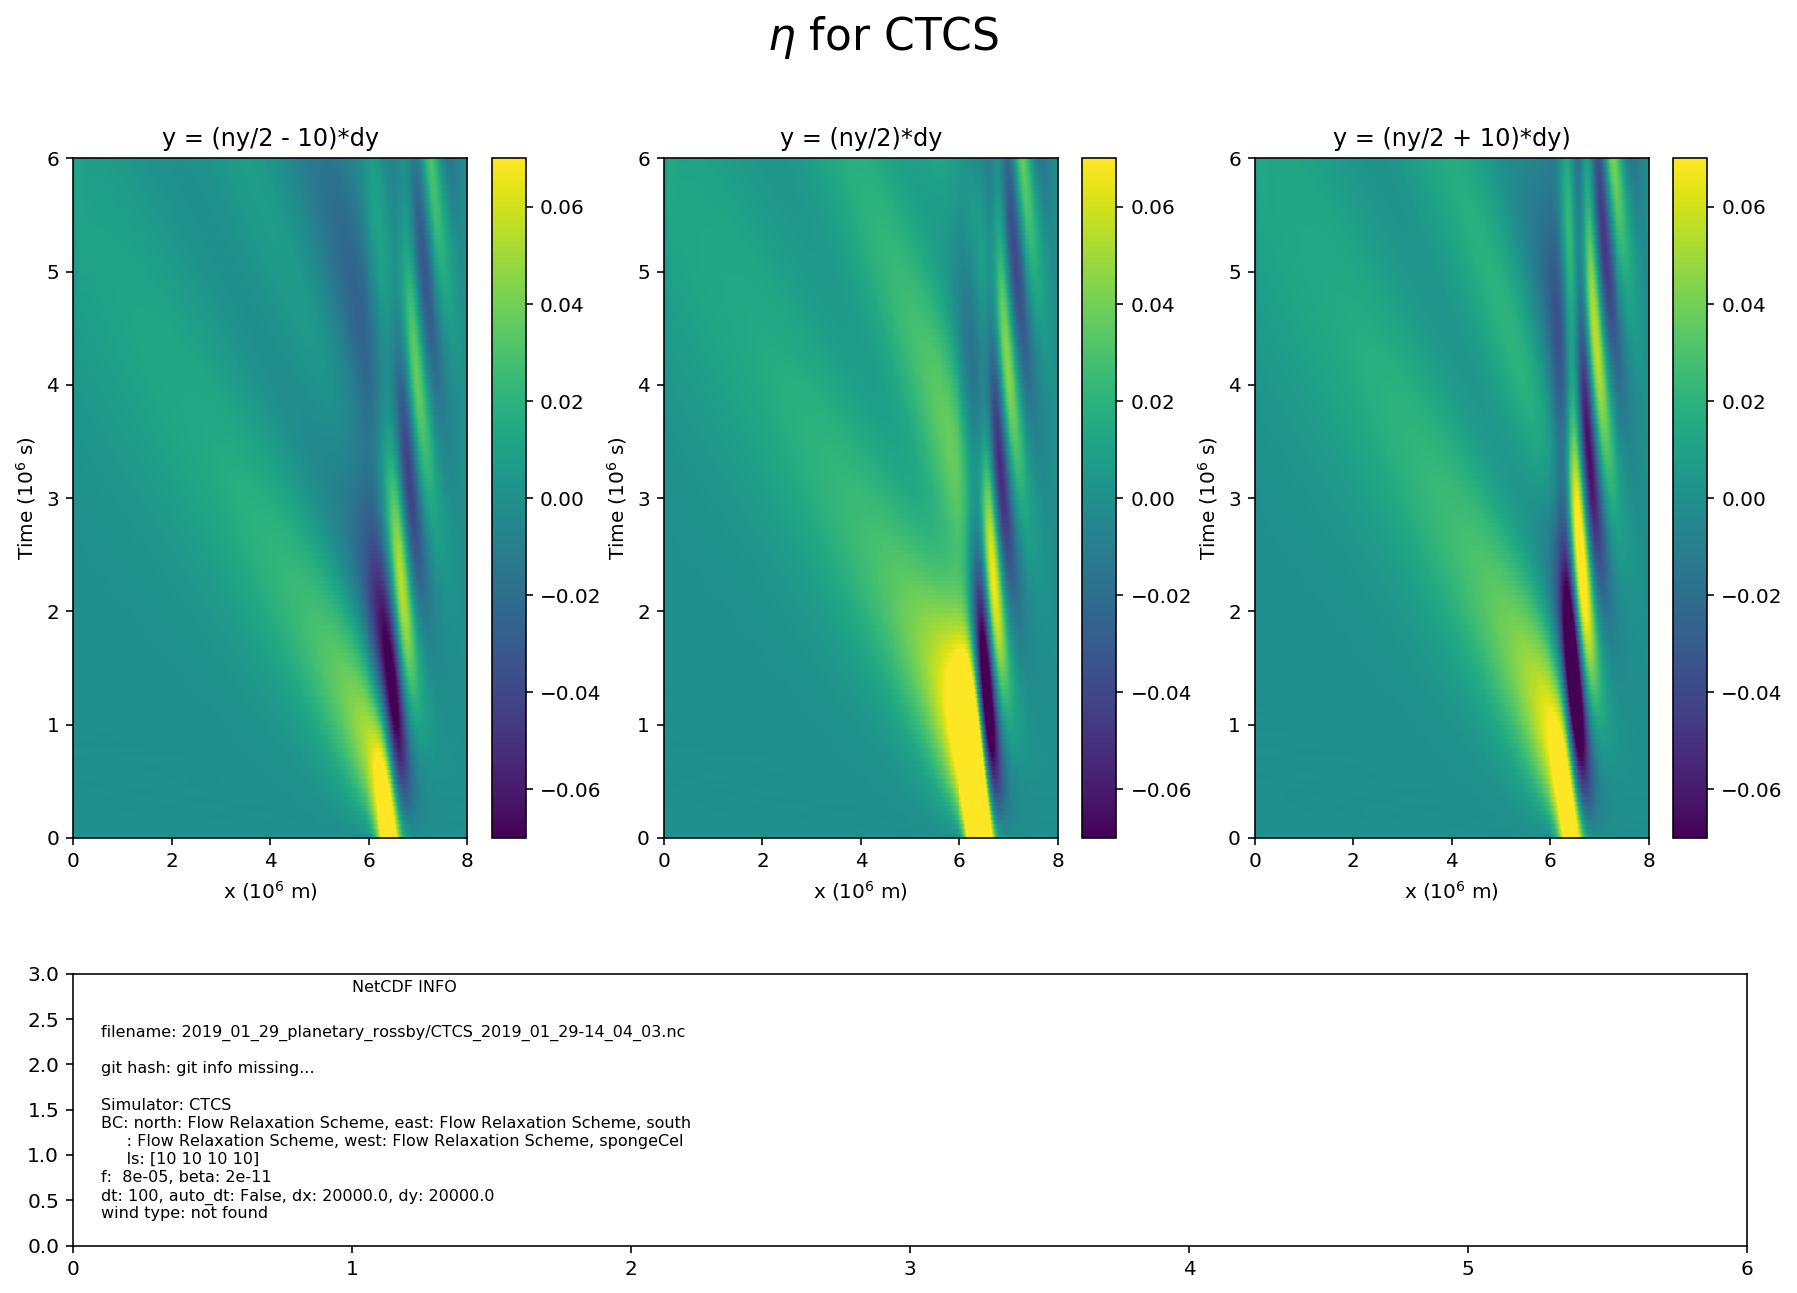

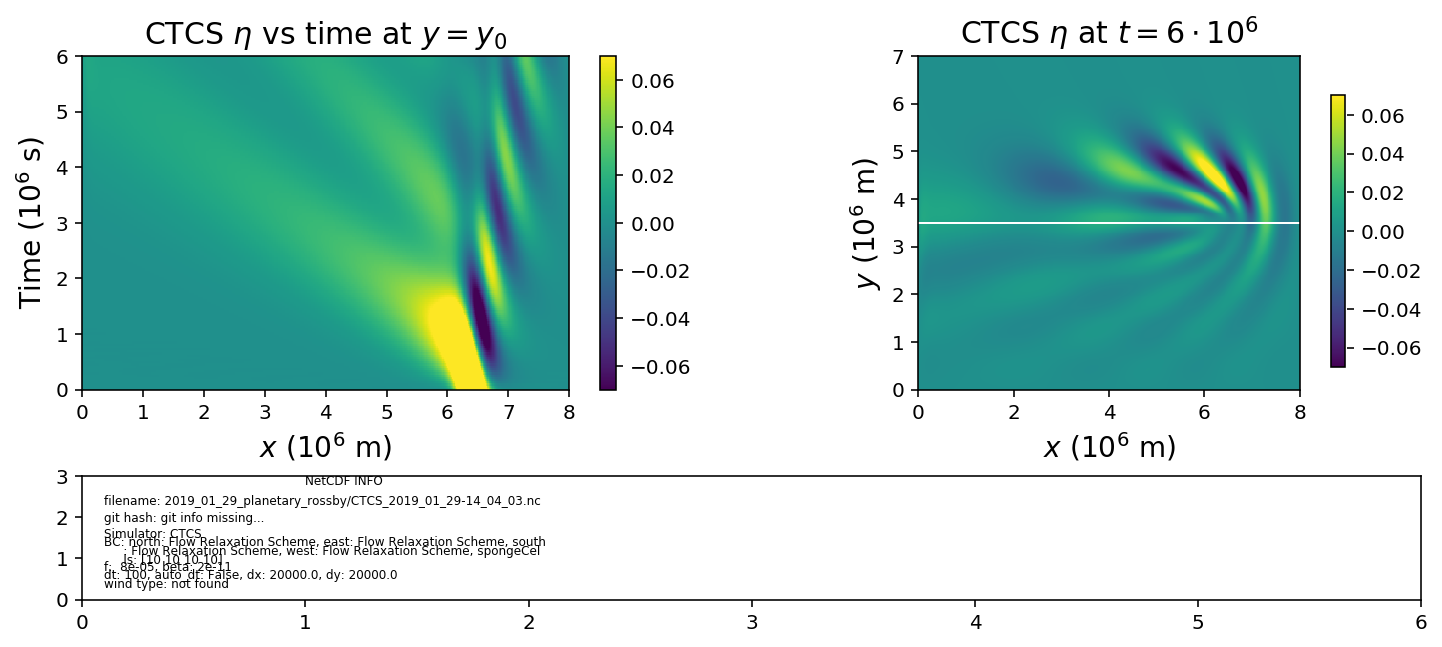

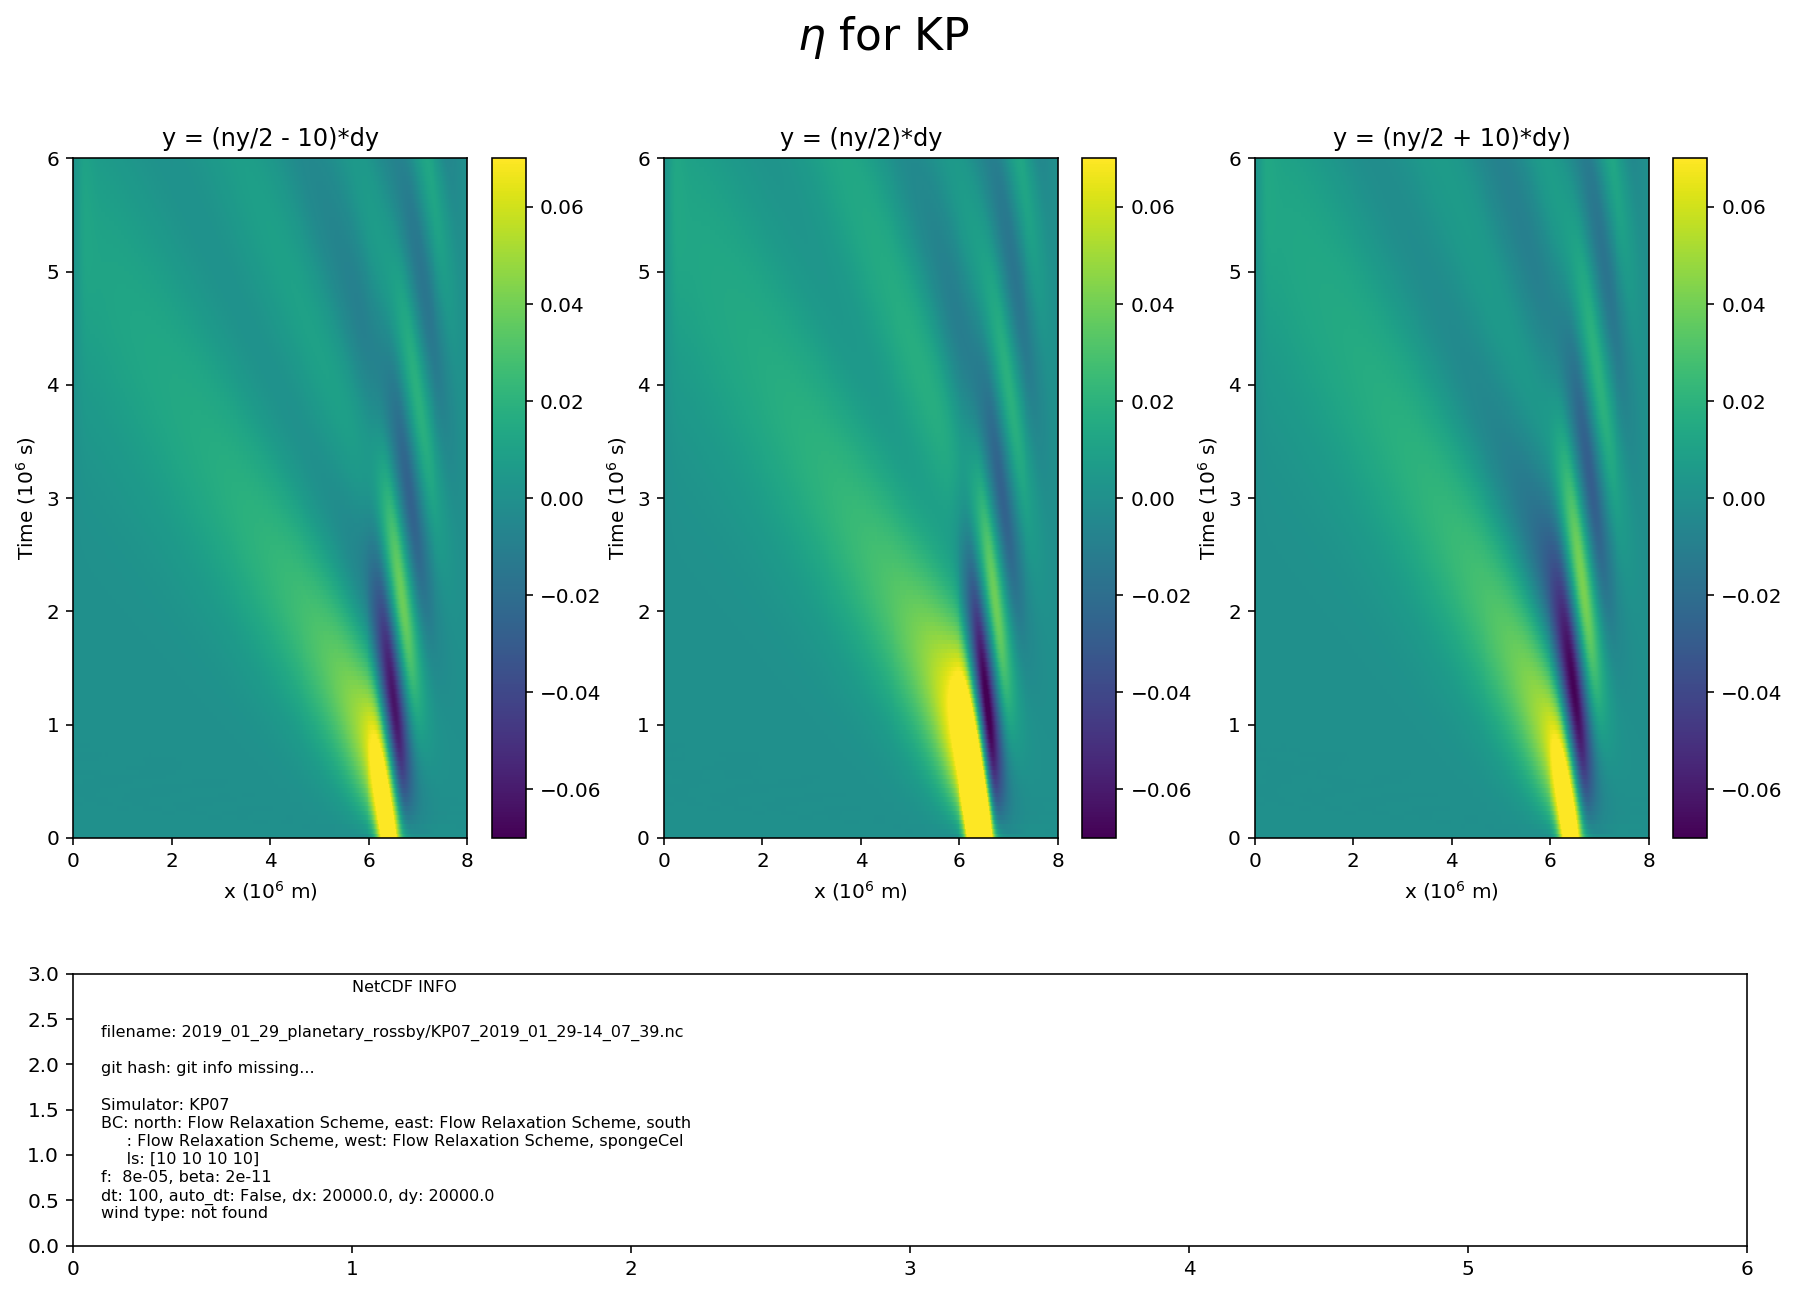

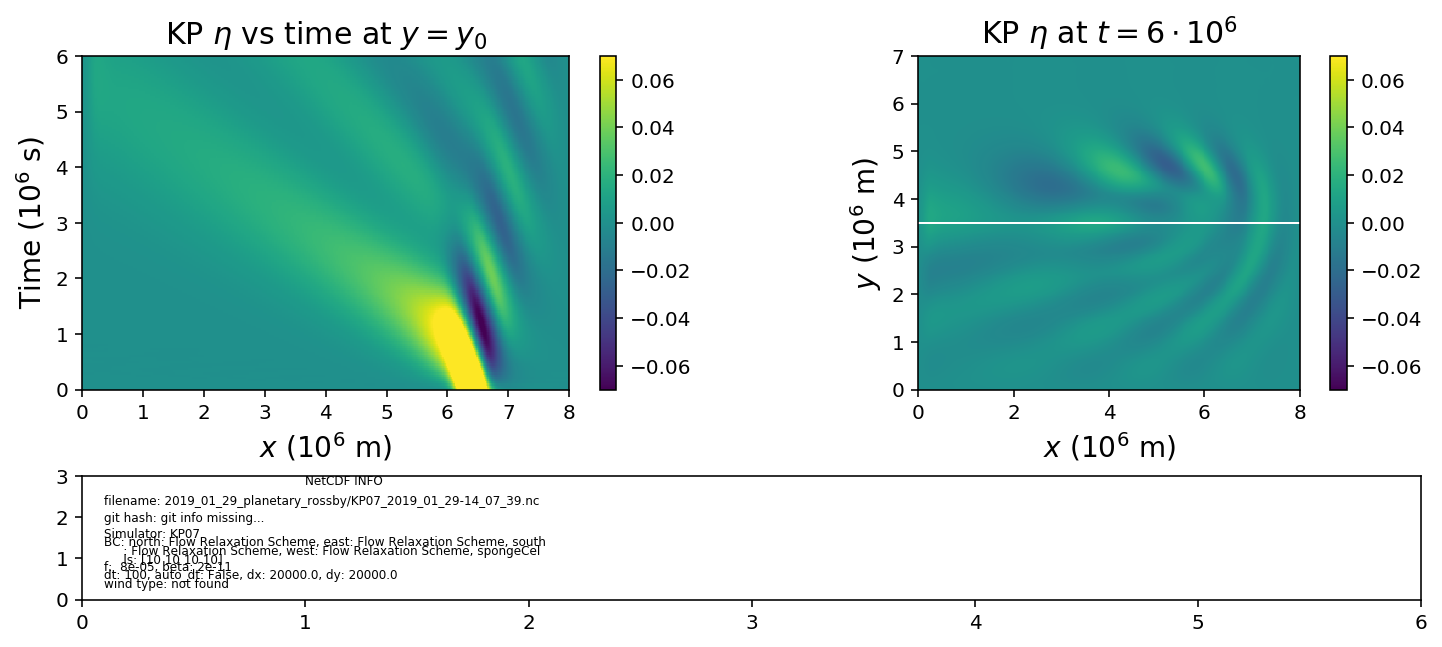

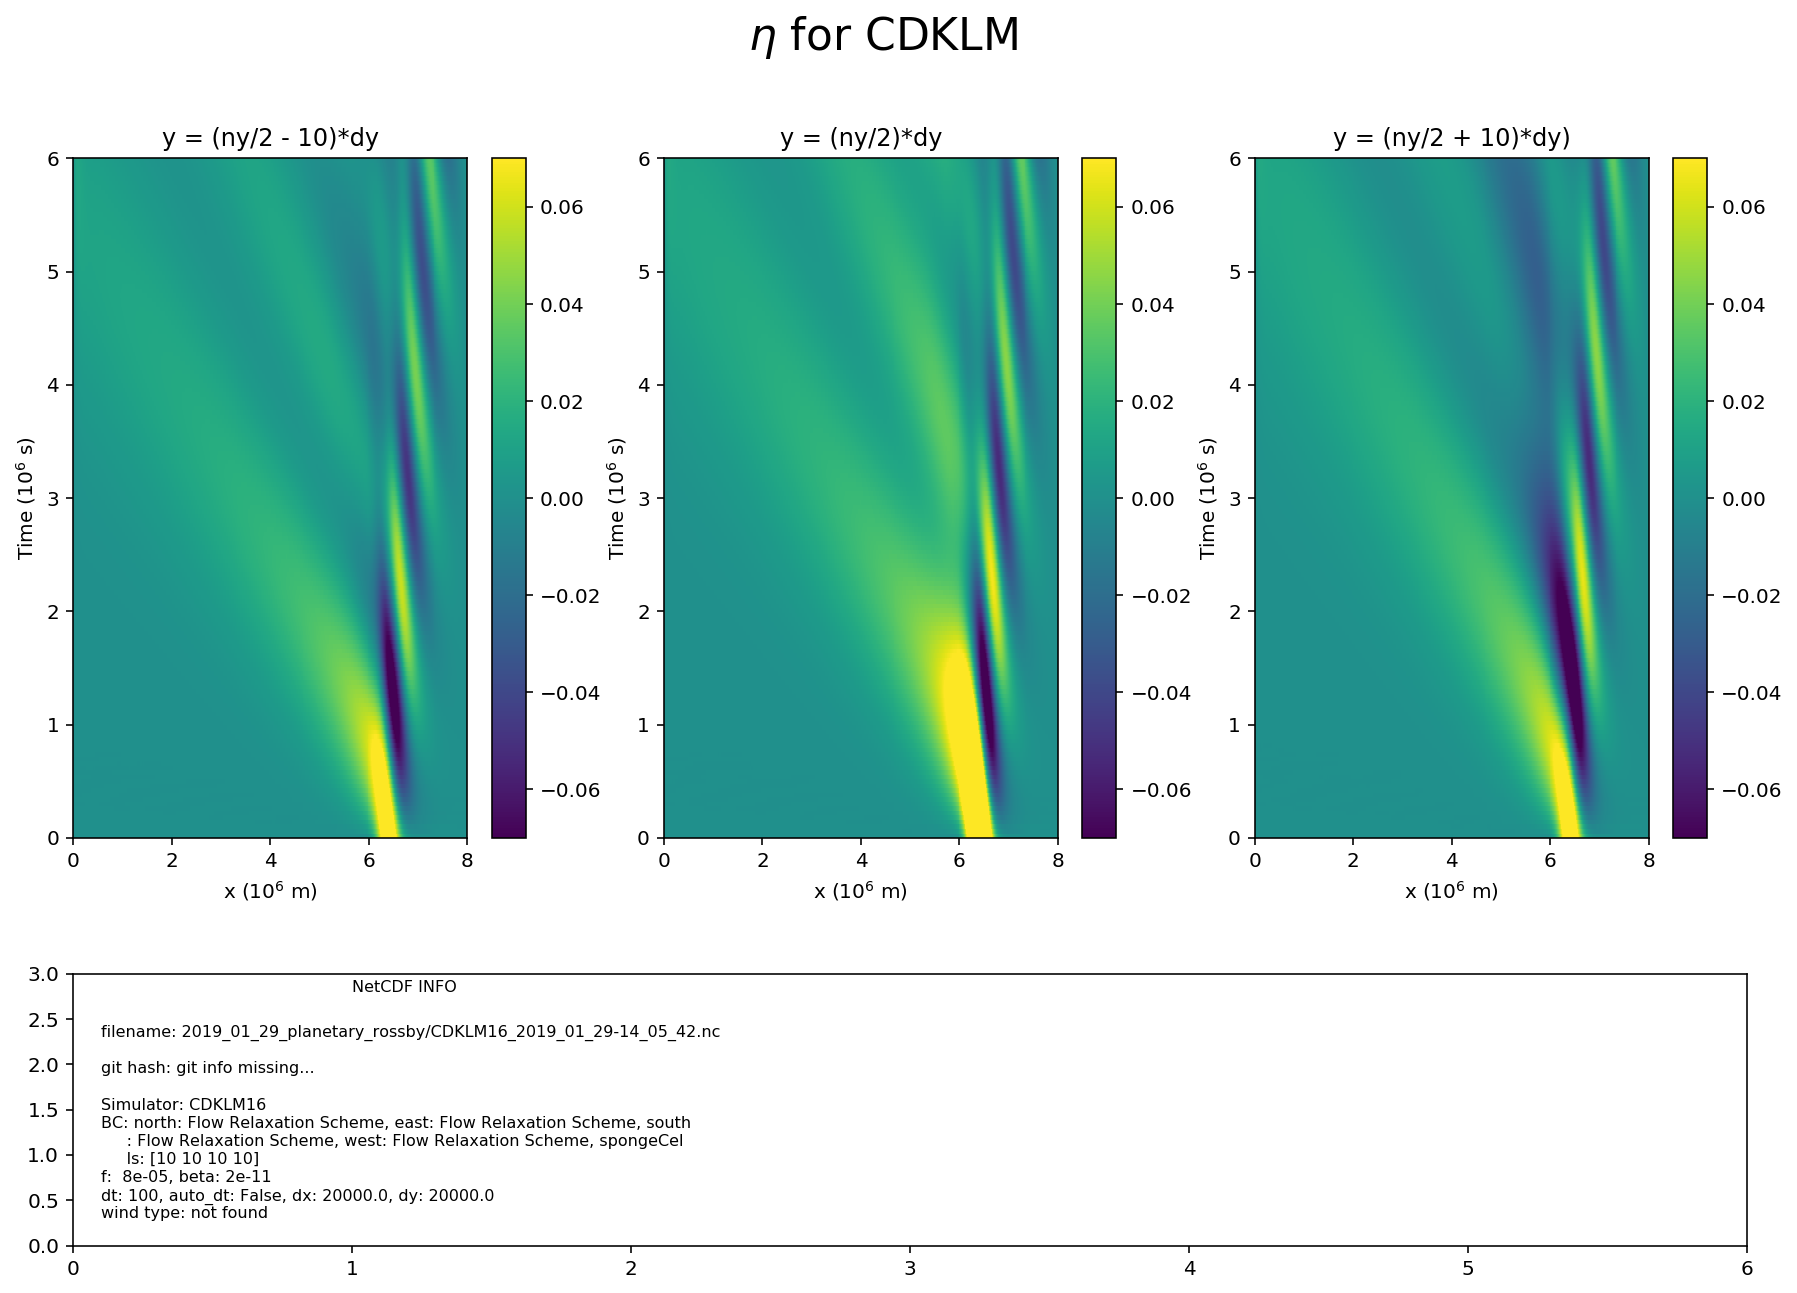

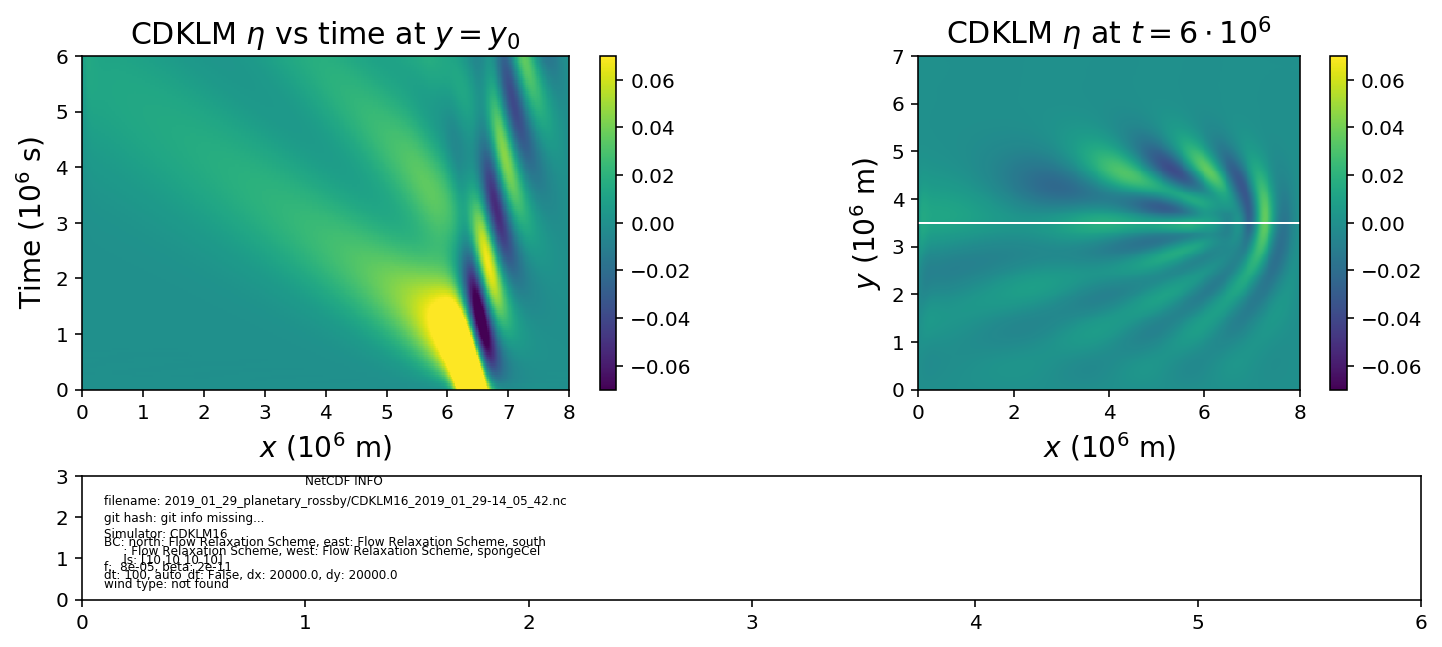

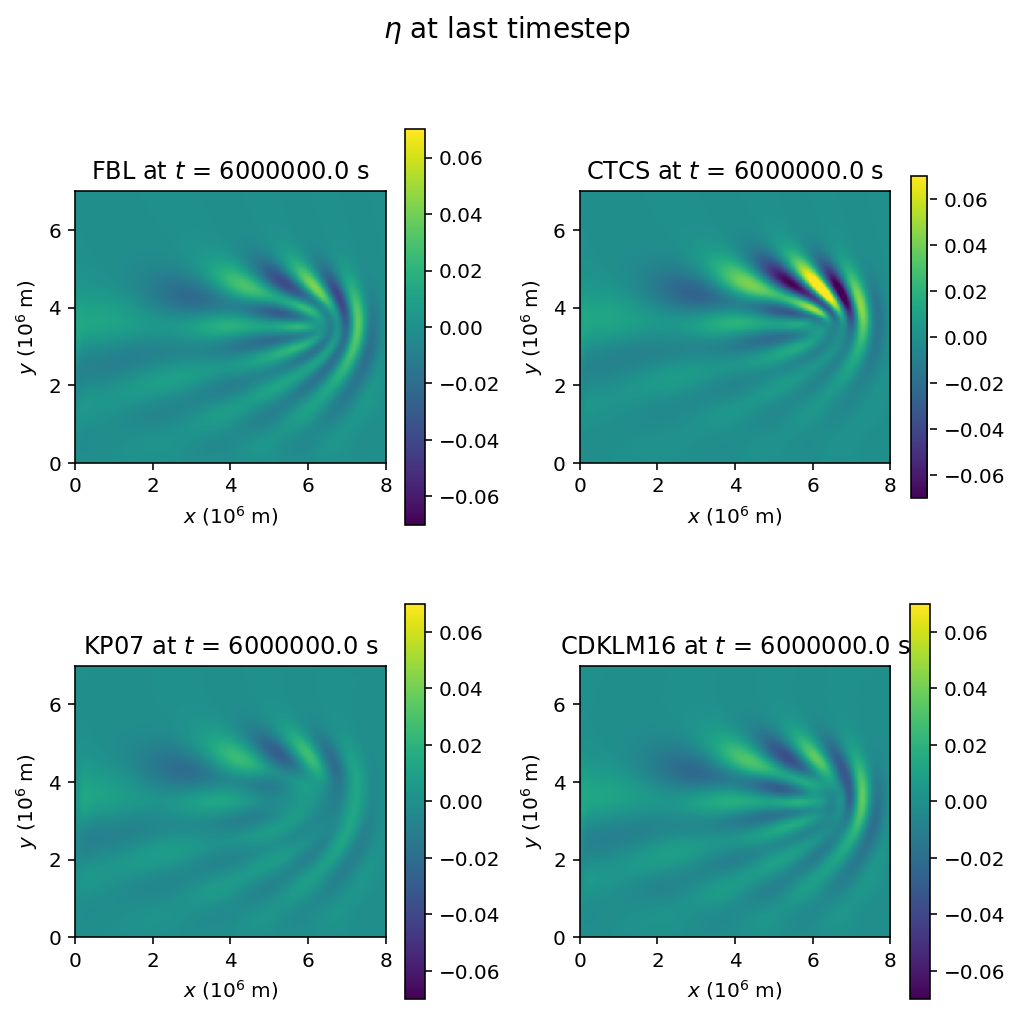

In [28]:

## Planetary Rossby waves, improved params :
folder = "2019_01_29_planetary_rossby/"
fbl_file_name =       folder+"FBL_2019_01_29-14_02_22.nc"
ctcs_file_name =     folder+"CTCS_2019_01_29-14_04_03.nc"
kp07_file_name =     folder+"KP07_2019_01_29-14_07_39.nc"
cdklm_file_name = folder+"CDKLM16_2019_01_29-14_05_42.nc"
imgdir = folder
rossby_waves = "planetary_rossby_waves"

TOPOGRAPHIC = False
if TOPOGRAPHIC:
    #Topographic Rossby waves, improved params
    folder = "2019_01_29_topographic_rossby/"
    fbl_file_name =       folder+"FBL_2019_01_29-14_34_10.nc"
    ctcs_file_name =     folder+"CTCS_2019_01_29-14_30_31.nc"
    kp07_file_name =     folder+"KP07_2019_01_29-14_35_52.nc"
    cdklm_file_name = folder+"CDKLM16_2019_01_29-14_32_14.nc"
    imgdir = folder
    rossby_waves = "topographic_rossby_waves"


imgdir='paper_images_' + datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
os.makedirs(imgdir)
imgdir = imgdir + "/"
print( "imgdir: " + imgdir)

sims = [SimReader.SimNetCDFReader(fbl_file_name), \
        SimReader.SimNetCDFReader(ctcs_file_name), \
        SimReader.SimNetCDFReader(kp07_file_name), \
        SimReader.SimNetCDFReader(cdklm_file_name) ]

etaMax =  0.07
etaMin = -0.07

for sim in range(4):
    fig = plt.figure(figsize=(15,10))
    T = sims[sim].getNumTimeSteps()
    nx = sims[sim].get('nx')
    ny = sims[sim].get('ny')
    xtplaneMid = np.zeros((T ,nx),  dtype=np.float32, order='C')
    xtplaneLower = np.zeros((T ,nx),  dtype=np.float32, order='C')
    xtplaneUpper = np.zeros((T ,nx),  dtype=np.float32, order='C')
    mid_y  = int(ny/ 2)
    low_y  = int(mid_y - 10)
    high_y = int(mid_y + 10)
    for t in range(T):
        xtplaneMid[t, :] = sims[sim].getEtaXSlice(t, mid_y)
        xtplaneLower[t, :] = sims[sim].getEtaXSlice(t, low_y)
        xtplaneUpper[t, :] = sims[sim].getEtaXSlice(t, high_y)
        
    print( "Max eta: " + str(np.max(xtplaneMid[50:, :])))
    print( "Min eta: " + str(np.min(xtplaneMid)))
       
    x_t_domain_extent = [ 0, sims[sim].get('dx')*nx*1e-6, 0, sims[sim].ncfile.variables['time'][-1]*1e-6 ]
    x_y_domain_extent = [ 0, sims[sim].get('dx')*nx*1e-6, 0, sims[sim].get('dy')*ny*1e-6]
    
    gridspec.GridSpec(3, 3)
    ax0 = plt.subplot2grid((3,3), (0,0), rowspan=2)
    ax0imshow = plt.imshow(xtplaneLower, origin="lower", extent=x_t_domain_extent)
    ax0imshow.set_clim(etaMin, etaMax)
    fig.colorbar(ax0imshow, ax=ax0)
    plt.title('y = (ny/2 - 10)*dy')
    plt.xlabel('x ($10^6$ m)')
    plt.ylabel('Time ($10^6$ s)')
    plt.axis('tight')
    
    ax0 = plt.subplot2grid((3,3), (0,1), rowspan=2)
    ax0imshow = plt.imshow(xtplaneMid, origin="lower", extent=x_t_domain_extent)
    ax0imshow.set_clim(etaMin, etaMax)
    fig.colorbar(ax0imshow, ax=ax0)
    plt.title('y = (ny/2)*dy')
    plt.xlabel('x ($10^6$ m)')
    plt.ylabel('Time ($10^6$ s)')
    plt.axis('tight')

    ax0 = plt.subplot2grid((3,3), (0,2), rowspan=2)
    ax0imshow = plt.imshow(xtplaneUpper, origin="lower", extent=x_t_domain_extent)
    ax0imshow.set_clim(etaMin, etaMax)
    fig.colorbar(ax0imshow, ax=ax0)
    plt.title('y = (ny/2 + 10)*dy)')
    plt.xlabel('x ($10^6$ m)')
    plt.ylabel('Time ($10^6$ s)')
    plt.axis('tight')

    ax1 = plt.subplot2grid((3,3), (2,0), rowspan=1, colspan=3)    
    sims[sim].makeInfoPlot(ax1)
    plt.title(" ")
    
    simName = sims[sim].get('simulator_short')
    if simName == "KP07":
        simName = "KP"
    elif simName == "CDKLM16":
        simName = "CDKLM"
    fig.subplots_adjust(hspace=.5)
    fig.suptitle("$\eta$ for " + simName, fontsize=22)
    fig.savefig(imgdir + rossby_waves + "_beta_plane_" + simName + ".png".format(t))
    fig.savefig(imgdir + rossby_waves + "_beta_plane_" + simName + ".pdf".format(t))
    
    ### Make figure with mid-slice and last time step
    
    fig = plt.figure(figsize=(12,5))
    
    AX = gridspec.GridSpec(3, 2)
    #AX.update(wspace=100)
    ax0 = plt.subplot2grid((3,2), (0,0), rowspan=2)
    ax0imshow = plt.imshow(xtplaneMid, origin="lower", extent=x_t_domain_extent)
    ax0imshow.set_clim(etaMin, etaMax)
    fig.colorbar(ax0imshow, ax=ax0)
    plt.title(simName + ' $\eta$ vs time at $y = y_0$', fontsize=15)
    plt.xlabel('$x$ ($10^6$ m)', fontsize=14)
    plt.ylabel('Time ($10^6$ s)', fontsize=14)
    plt.axis('tight')
    
    eta, hu, hv, t = sims[sim].getLastTimeStep()
    ax0 = plt.subplot2grid((3,2), (0,1), rowspan=2)
    ax0imshow = ax0.imshow(eta, origin="lower", extent=x_y_domain_extent)
    ax0.plot([0,8], [3.5, 3.5], 'white', linewidth=1.0)
    fig.colorbar(ax0imshow, ax=ax0)
    plt.title(simName + " $\eta$ at $t = 6 \cdot 10^6$", fontsize=15)
    #plt.title(simName + " $\eta$ at $t$ = " + str(t) + " s", fontsize=15)
    #ax0imshow.set_clim(etaMin/1.5, etaMax/1.5)
    ax0imshow.set_clim(etaMin, etaMax)
    plt.xlabel('$x$ ($10^6$ m)', fontsize=14)
    plt.ylabel('$y$ ($10^6$ m)', fontsize=14)
    
    
    ax1 = plt.subplot2grid((3,2), (2,0), rowspan=1, colspan=2)    
    sims[sim].makeInfoPlot(ax1, text_font_size=6)
    plt.title("")

    #fig.suptitle("Eta for " + simName, fontsize=22)
    fig.subplots_adjust(hspace=.7)
    fig.savefig(imgdir + rossby_waves + "_results_" + simName + ".png".format(t))
    fig.savefig(imgdir + rossby_waves + "_results_" + simName + ".pdf".format(t))
        
        
# Compare last timestep between them all:
def lastTimeStepImShow(sim, ax0):
    eta, hu, hv, t = sim.getLastTimeStep()
    
    ax0imshow = ax0.imshow(eta, origin="lower", extent=x_y_domain_extent)
    fig.colorbar(ax0imshow, ax=ax0)
    plt.title(sim.get('simulator_short') + " at $t$ = " + str(t) + " s")
    plt.xlabel('$x$ ($10^6$ m)')
    plt.ylabel('$y$ ($10^6$ m)')
    #ax0imshow.set_clim(etaMin/1.5, etaMax/1.5)
    ax0imshow.set_clim(etaMin, etaMax)
    

fig = plt.figure(figsize=(8, 8)) 
gs = gridspec.GridSpec(2, 2)
for i in range(4):
    ax0 = plt.subplot(gs[i])
    lastTimeStepImShow(sims[i], ax0)
plt.subplots_adjust(wspace=.3)
fig.suptitle("$\eta$ at last timestep", fontsize=14)
fig.savefig(imgdir + rossby_waves + "_last_timestep.png".format(t))
fig.savefig(imgdir + rossby_waves + "_last_timestep.pdf".format(t))
#fig.tight_layout()



In [29]:
print (imgdir)

paper_images_2019_02_04-14_20_42/


In [40]:
eta, hu, hv, t = sims[3].getLastTimeStep()

Text(0.5, 1.0, 'hv')

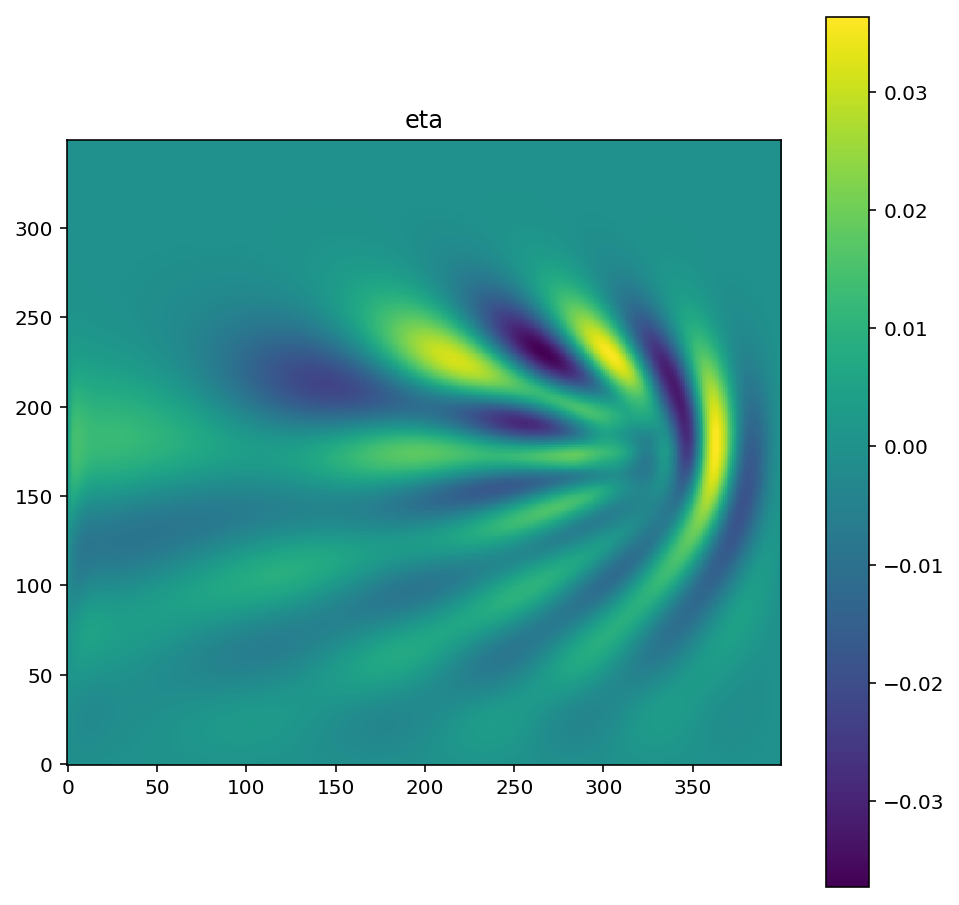

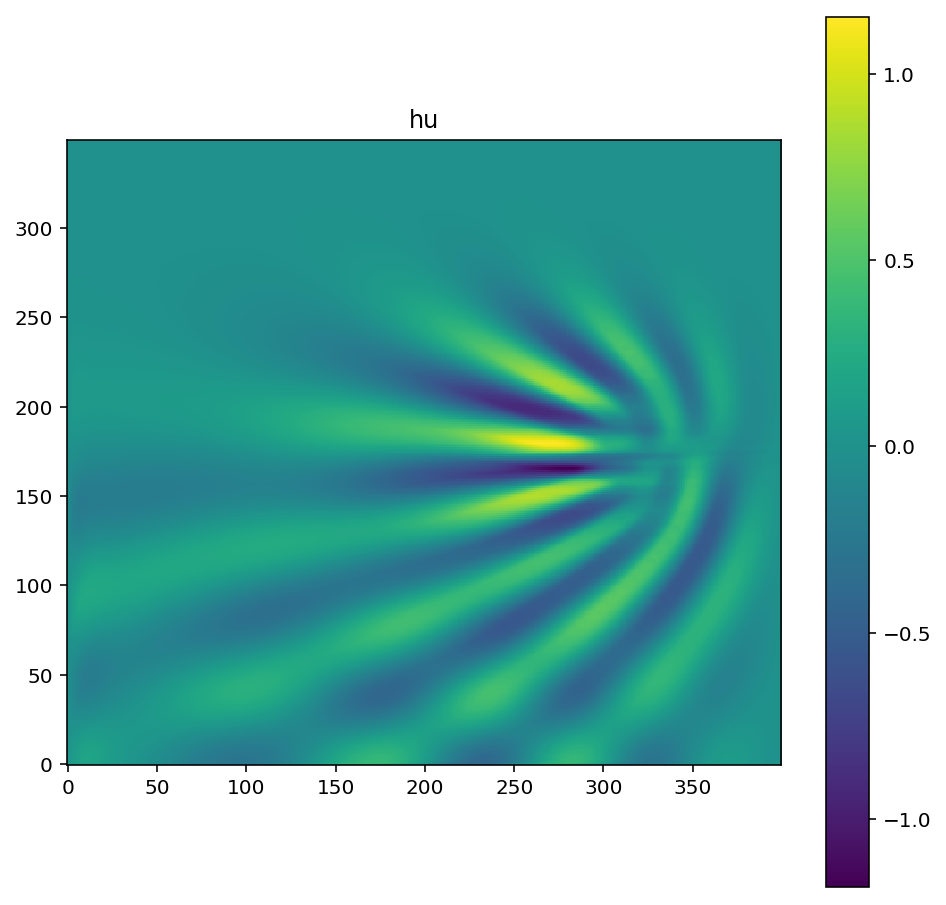

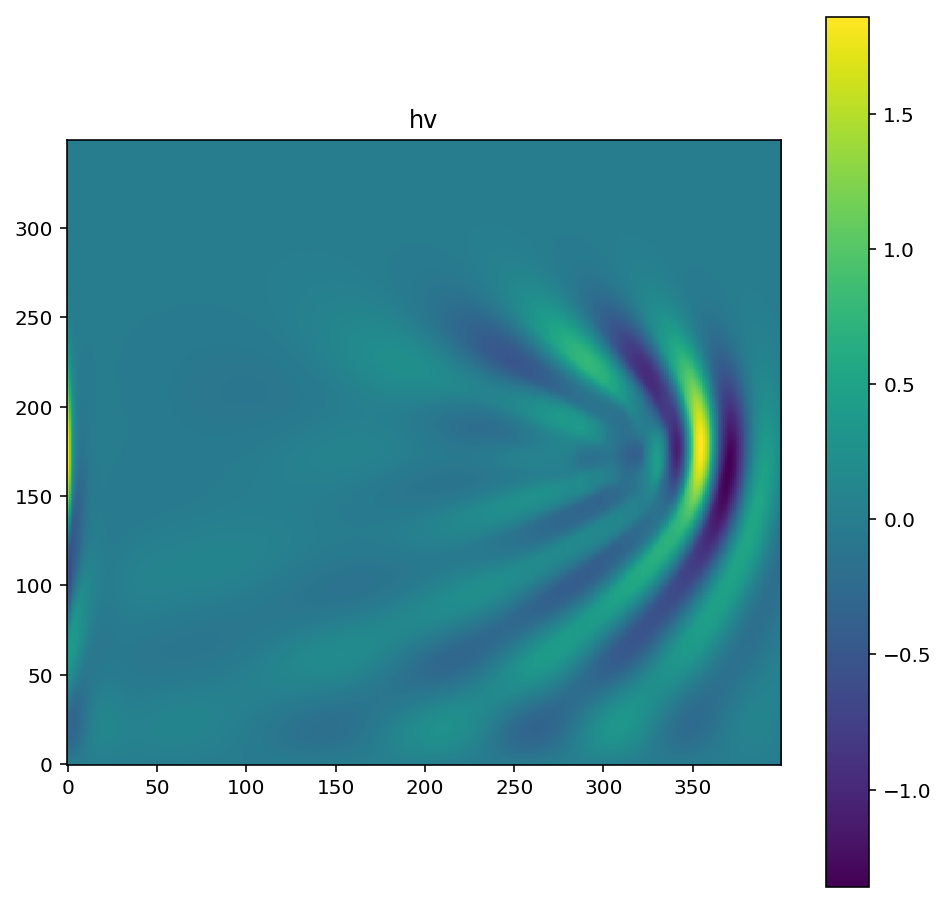

In [42]:
fig = plt.figure(figsize=(8,8))
plt.imshow(eta, interpolation="none", origin='lower')
plt.colorbar()
plt.title("eta")

fig = plt.figure(figsize=(8,8))
plt.imshow(hu, interpolation="none", origin='lower')
plt.colorbar()
plt.title("hu")

fig = plt.figure(figsize=(8,8))
plt.imshow(hv, interpolation="none", origin='lower')
plt.colorbar()
plt.title("hv")